In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.utils import *

# Data Import
1. On-time performance
2. Daily weather data (pending)
3. Traffic/construction data (pending)

In [2]:
ON_TIME = import_data("ON_TIME")
ON_TIME

,Stop Number,Route Number,Day Type,Scheduled Time,Deviation,Long,Lat,Route,Delay Type
0,30893,71,Weekday,2021-08-03 12:57:00,-83,-97.148700,49.958300,"(71, Arlington, Portage via Sinclair)",on-time
1,30894,71,Weekday,2021-08-03 12:57:47,-131,-97.144732,49.957068,"(71, Arlington, Portage via Sinclair)",early
2,30884,71,Weekday,2021-08-03 12:58:20,-112,-97.145920,49.955548,"(71, Arlington, Portage via Sinclair)",on-time
3,30377,71,Weekday,2021-08-03 13:00:00,-128,-97.145247,49.952372,"(71, Arlington, Portage via Sinclair)",early
4,30378,71,Weekday,2021-08-03 13:01:02,-277,-97.140930,49.951178,"(71, Arlington, Portage via Sinclair)",early
...,...,...,...,...,...,...,...,...,...
4264663,40043,47,Weekday,2021-08-17 10:26:36,-252,-96.992926,49.895046,"(47, Transcona - Pembina, Transcona via Regent)",early
4264664,40037,47,Weekday,2021-08-17 10:27:13,-248,-96.989166,49.895062,"(47, Transcona - Pembina, Transcona via Regent)",early
4264665,40031,47,Weekday,2021-08-17 10:27:42,-248,-96.986778,49.895893,"(47, Transcona - Pembina, Transcona via Regent)",early
4264666,40029,47,Weekday,2021-08-17 10:28:03,-240,-96.984648,49.895901,"(47, Transcona - Pembina, Transcona via Regent)",early


# Simple Visualization
1. Dates of record
2. Routes and Bus stops
3. Bus On-time performance
4. Locations (pending)

In [10]:
df = ON_TIME.copy()

## 1. Dates of records

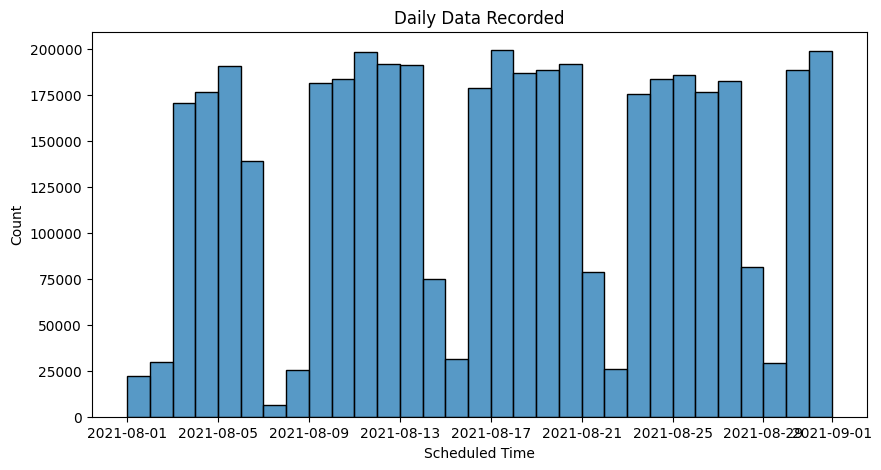

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df,x='Scheduled Time',binwidth=1)
plt.title("Daily Data Recorded")
plt.show()

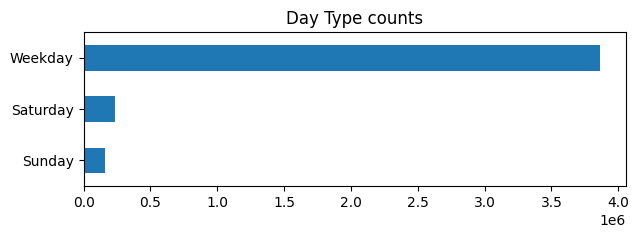

In [12]:
plt.figure(figsize=(7,2))
ax3 = df['Day Type'].value_counts()[::-1].plot.barh()
ax3.set_title(f"Day Type counts")
plt.show()

## 2. Routes and Bus stops

In [25]:
DF_STOP_NUMBER = df[["Stop Number","Long","Lat"]].value_counts().reset_index().set_index("Stop Number").rename(columns={0:"count"})
DF_STOP_NUMBER

,Long,Lat,count
Stop Number,,,
10629,-97.137818,49.899911,11345
10628,-97.138599,49.896991,11302
10581,-97.147576,49.892025,10039
10582,-97.143579,49.893500,10002
10583,-97.140048,49.894801,9940
...,...,...,...
30320,-97.158303,49.920027,1
40566,-97.070178,49.937996,1
40564,-97.073245,49.939027,1


In [68]:
stations_loc = [[ 49.826952, -97.152312],
 [ 49.848695, -97.049665],
 [ 49.850579, -97.112202],
 [ 49.8819,   -97.089342],
 [ 49.906744, -97.123028],
 [ 49.945949, -97.187758],
 [ 49.951733, -97.149032],
 [ 49.934985, -97.096166]]
DF_STATION = pd.DataFrame(stations_loc,columns=["Lat","Long"])
DF_STATION

,Lat,Long
0,49.826952,-97.152312
1,49.848695,-97.049665
2,49.850579,-97.112202
3,49.881900,-97.089342
4,49.906744,-97.123028
5,49.945949,-97.187758
6,49.951733,-97.149032
7,49.934985,-97.096166


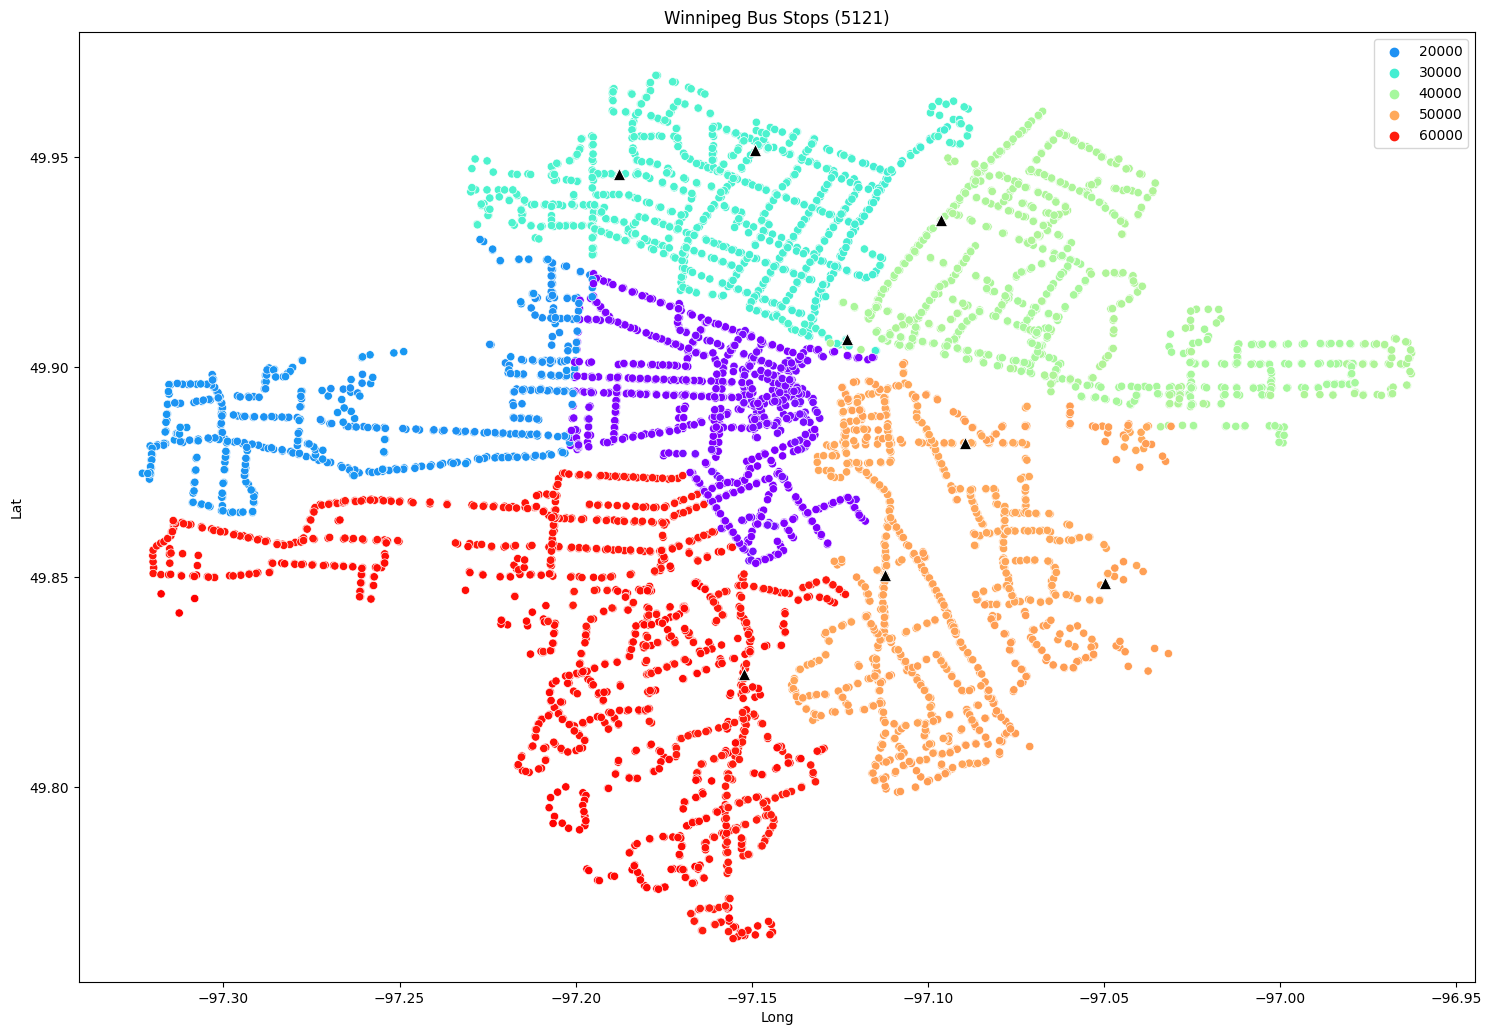

In [103]:
SIZE = 50
cols = ["Long","Lat"]
lg,lt = DF_STOP_NUMBER[cols].max() - DF_STOP_NUMBER[cols].min()
plt.figure(figsize=(SIZE*lg,(SIZE*1.2)*lt))
sns.scatterplot(data=DF_STOP_NUMBER.reset_index(),x='Long',y='Lat',hue='Stop Number',palette="rainbow",marker='o') 
sns.scatterplot(data=DF_STATION.reset_index(),x='Long',y='Lat',color='black',marker='^',s=80)
plt.title(f"Winnipeg Bus Stops ({len(DF_STOP_NUMBER)})")
plt.show()

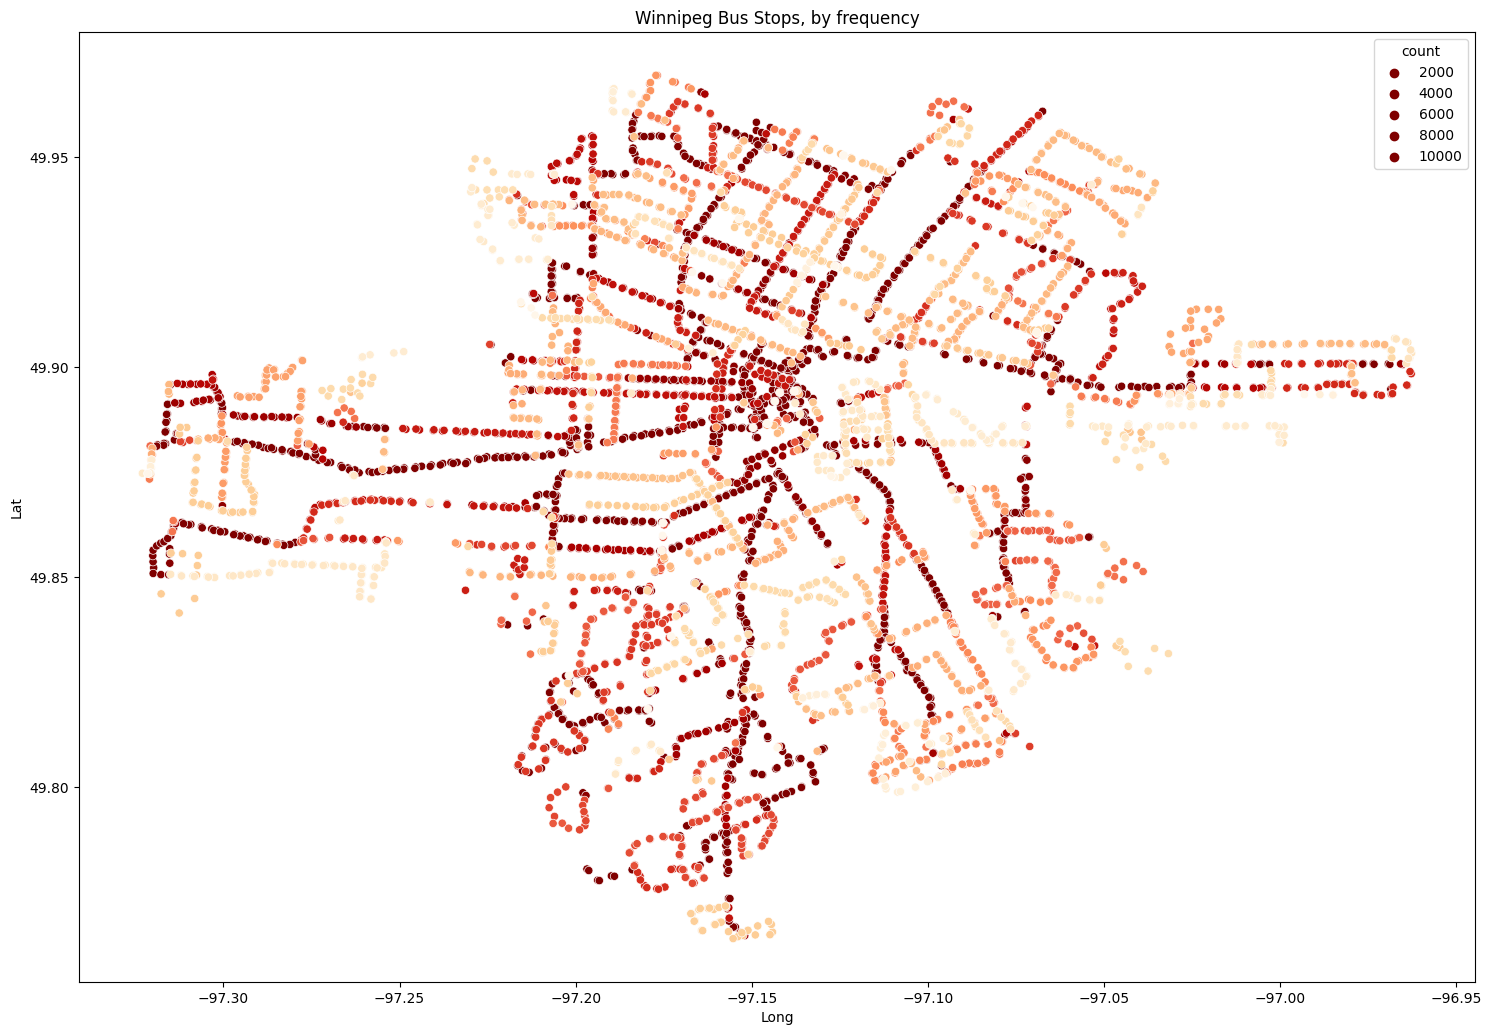

In [112]:
IZE = 50
cols = ["Long","Lat"]
lg,lt = DF_STOP_NUMBER[cols].max() - DF_STOP_NUMBER[cols].min()
plt.figure(figsize=(SIZE*lg,(SIZE*1.2)*lt))
sns.scatterplot(data=DF_STOP_NUMBER.reset_index(),x='Long',y='Lat',hue='count',hue_norm=(0,1000),palette="OrRd",marker='o') 
plt.title(f"Winnipeg Bus Stops, by frequency")
plt.show()

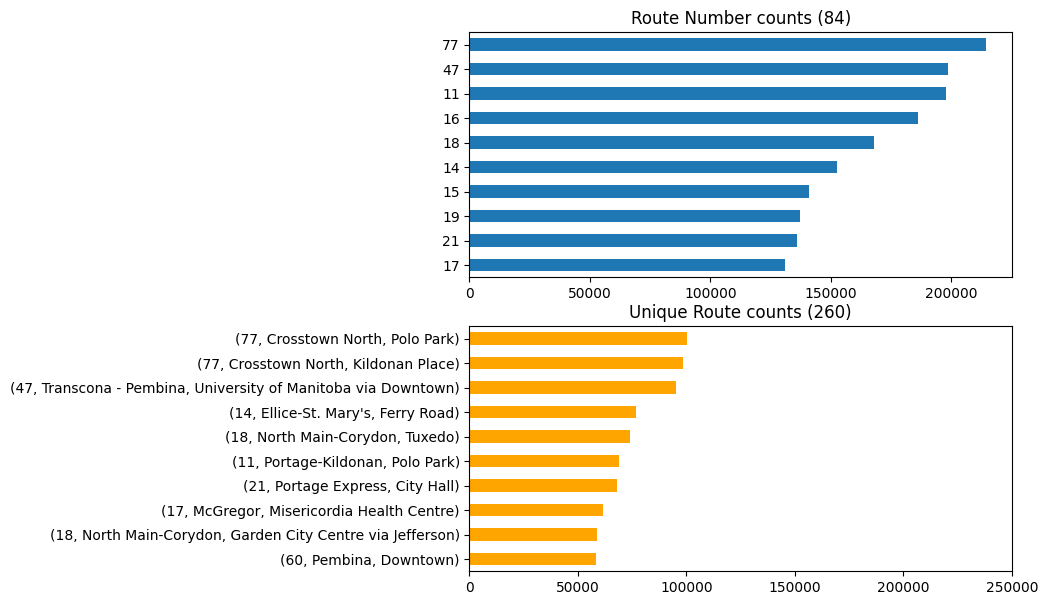

In [14]:
plt.figure(figsize=(7,7))
n = 10
plt.subplot(211)
ax1 = df['Route Number'].value_counts()[:n][::-1].plot.barh()
ax1.set_title(f"Route Number counts ({len(df['Route Number'].value_counts())})")
plt.subplot(212)
ax2 = df['Route'].value_counts()[:n][::-1].plot.barh(color='orange')
ax2.set_xticks(ax1.get_xticks())
ax2.set_title(f"Unique Route counts ({len(df['Route'].value_counts())})")
plt.show()

In [93]:
d = {}
d_final = {}
prv_rt = ''
rt_seq = []
for stp,rt in df[['Stop Number','Route']].values:
    # If new sequence:
    if rt != prv_rt and prv_rt != '':
        # Conclude the old seq
        if prv_rt not in d_final.keys():
            if prv_rt in d.keys() and tuple(rt_seq) == tuple(d[prv_rt]):
                d_final[prv_rt] = rt_seq
            else:
                d[prv_rt] = rt_seq
        # Prepare for new seq
        rt_seq = []
    rt_seq.append(stp)
    prv_rt = rt
if prv_rt not in d_final.keys():
    if prv_rt in d.keys() and rt_seq == d[rt]:
        d_final[prv_rt] = rt_seq
DF_RT_SEQ = pd.DataFrame(d_final.items(),columns=["Route","Stop Sequence"]).sort_values("Route")
DF_RT_SEQ


,Route,Stop Sequence
145,"(10, St. Boniface-Wolseley, Downtown)","[50230, 50227, 50226, 50223, 50221, 50205, 502..."
131,"(10, St. Boniface-Wolseley, St. Boniface via P...","[10232, 10230, 10228, 11054, 10874, 10205, 102..."
85,"(10, St. Boniface-Wolseley, St. Boniface via T...","[10230, 10228, 11054, 10874, 10205, 10202, 102..."
165,"(10, St. Boniface-Wolseley, Wolseley)","[10541, 10542, 10527, 10138, 10699, 10700, 105..."
86,"(10, St. Boniface-Wolseley, Wolseley via Tache)","[50230, 50227, 50226, 50223, 50221, 50205, 502..."
...,...,...
62,"(97, Inkster Industrial Park - Point Douglas, ...","[40852, 30545, 30628, 30777, 30094, 30821, 307..."
63,"(97, Inkster Industrial Park - Point Douglas, ...","[30542, 30547, 30887, 30888, 30832, 30554, 305..."
0,"(BLUE, Route BLUE, Downtown)","[60675, 60105, 60103, 61255, 61214, 61212, 612..."
64,"(BLUE, Route BLUE, St. Norbert)","[10831, 10838, 10132, 10134, 10618, 10616, 106..."


<Figure size 2882.43x1973.11 with 0 Axes>

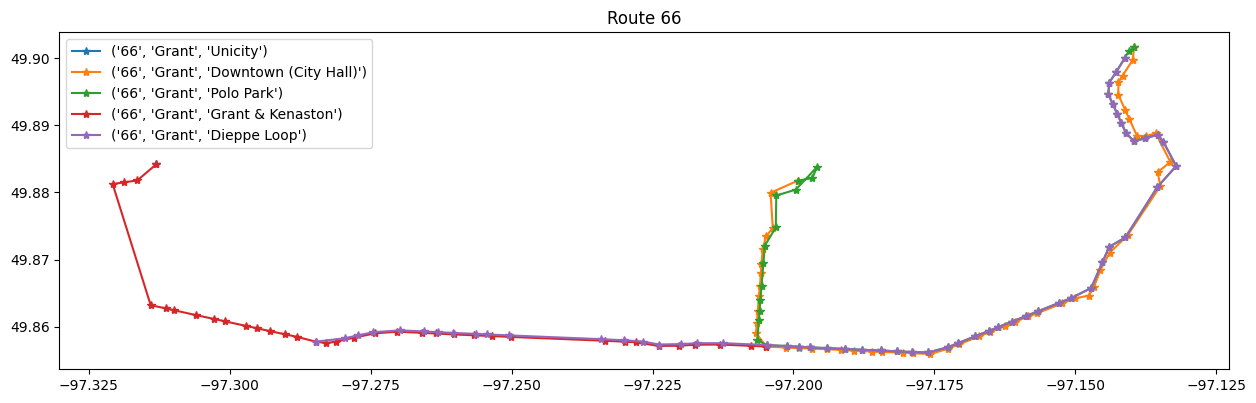

In [94]:
SIZE = 80
route_number = '66'
cols = ["Long","Lat"]
df2 = DF_RT_SEQ.set_index("Route").loc[pd.unique(df[df["Route Number"] == route_number]["Route"])].reset_index()
lg,lt = df[df["Route Number"] == route_number][cols].max() - df[df["Route Number"] == route_number][cols].min()
plt.figure(figsize=(SIZE*lg,(SIZE*1.2)*lt))
for route,seq in zip(df2["Route"],df2["Stop Sequence"]):
        coords_i = DF_STOP_NUMBER.loc[pd.Index(seq),cols]
        plt.plot(coords_i['Long'],coords_i['Lat'],'-*',label=route)
plt.legend()
plt.title(f"Route {route_number}")
plt.show()

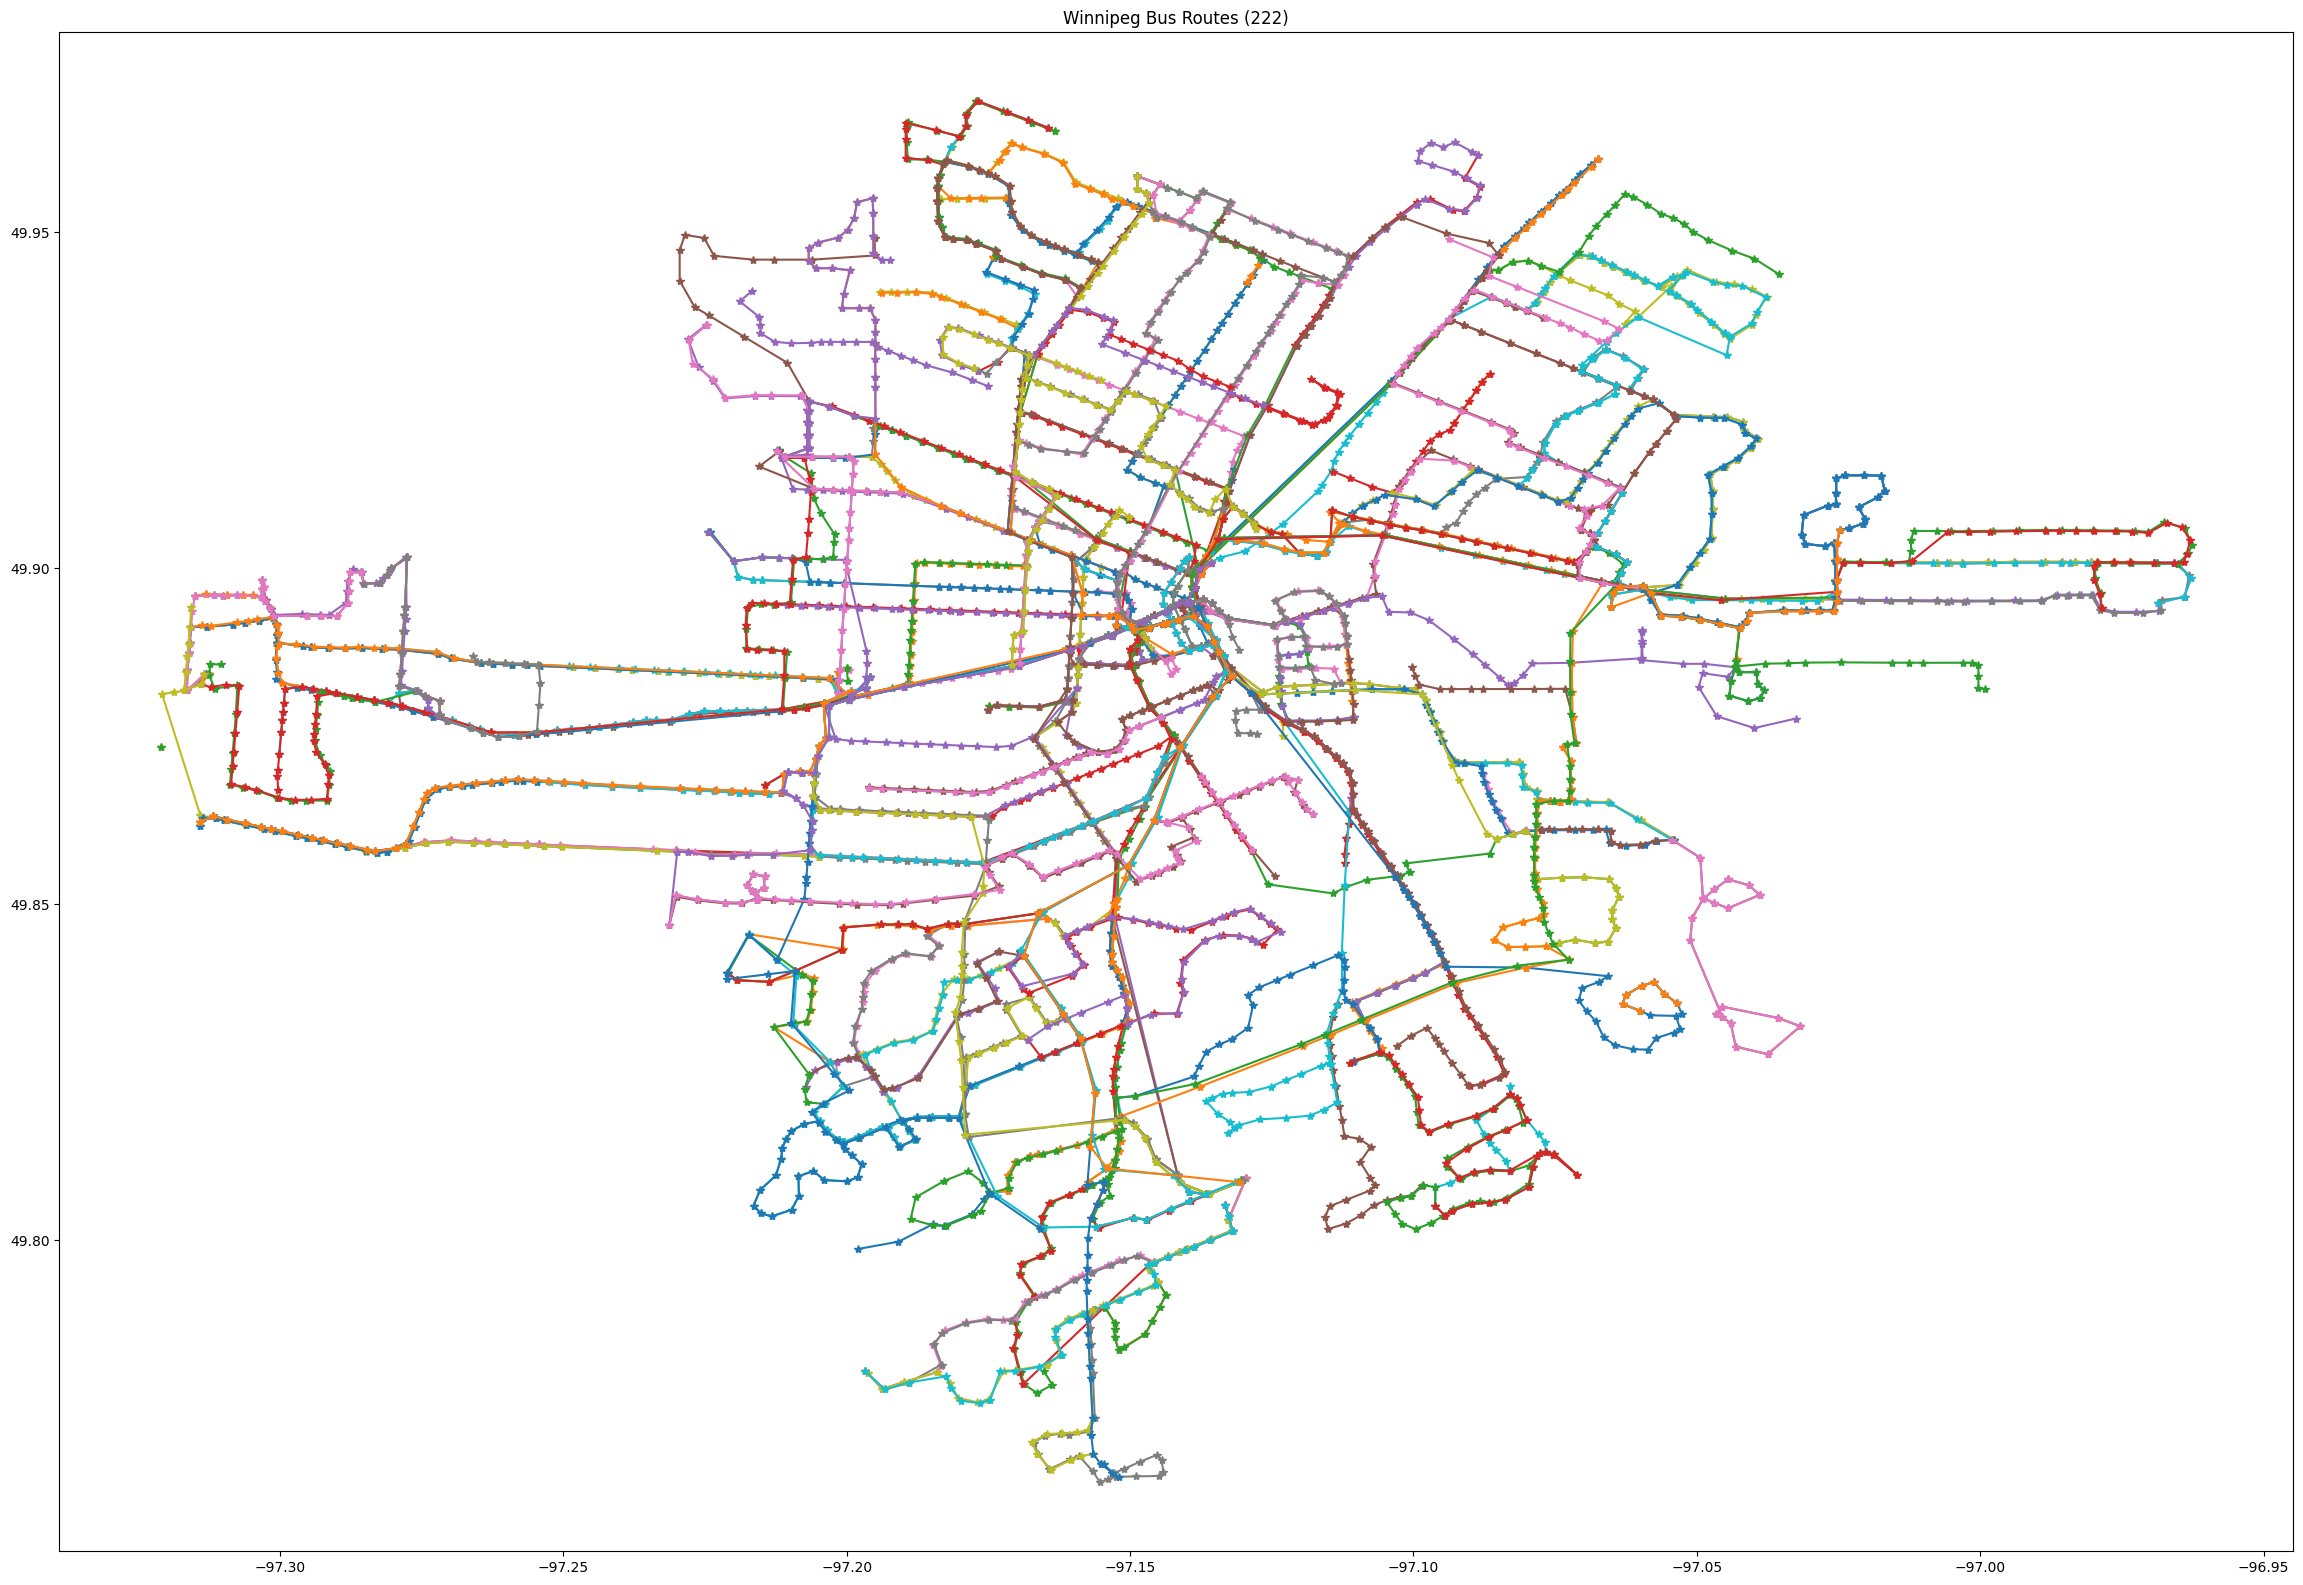

In [100]:
SIZE = 80
cols = ["Long","Lat"]
lg,lt = DF_STOP_NUMBER[cols].max() - DF_STOP_NUMBER[cols].min()
plt.figure(figsize=(SIZE*lg,(SIZE*1.2)*lt))
for route,seq in zip(DF_RT_SEQ["Route"],DF_RT_SEQ["Stop Sequence"]):
        coords_i = DF_STOP_NUMBER.loc[pd.Index(seq),cols]
        plt.plot(coords_i['Long'],coords_i['Lat'],'-*',label=route)
plt.title(f"Winnipeg Bus Routes ({len(DF_RT_SEQ)})")
plt.show()

## 3. Bus On-time Performance

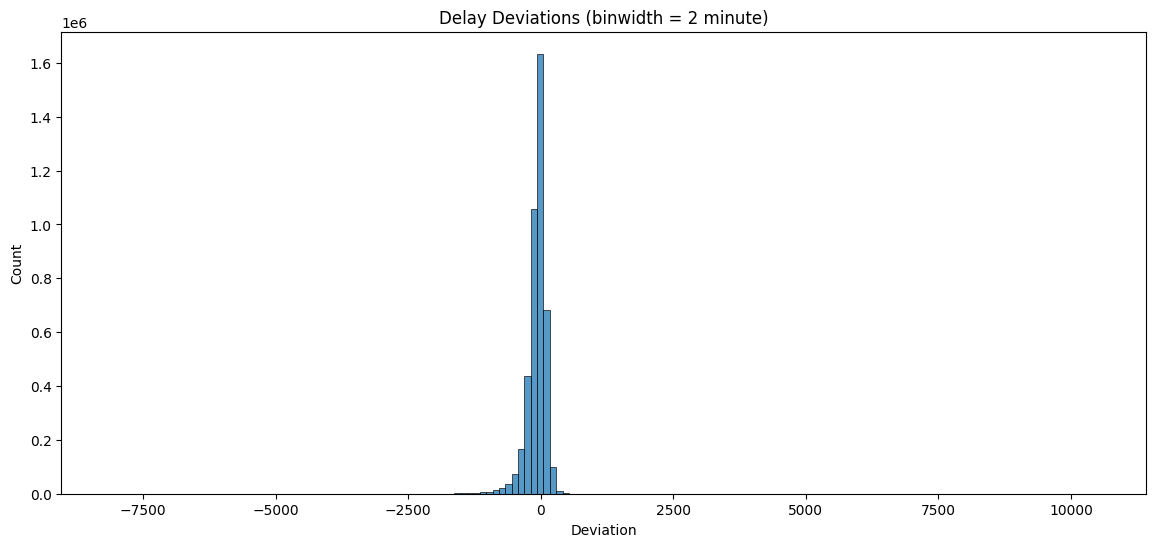

In [96]:
plt.figure(figsize=(14,6))
sns.histplot(df['Deviation'],binwidth=2*MIN)
plt.title("Delay Deviations (binwidth = 2 minute)")
plt.show()

Delay types:
- Early: < -2 min
- On-time: Within -2 min - <2 min
- Short delay: 2 min - <10 min,
- Medium delay: 10 min - <30 min,
- Long delay: 30 min - <60 min,
- Severe delay: 60+ min

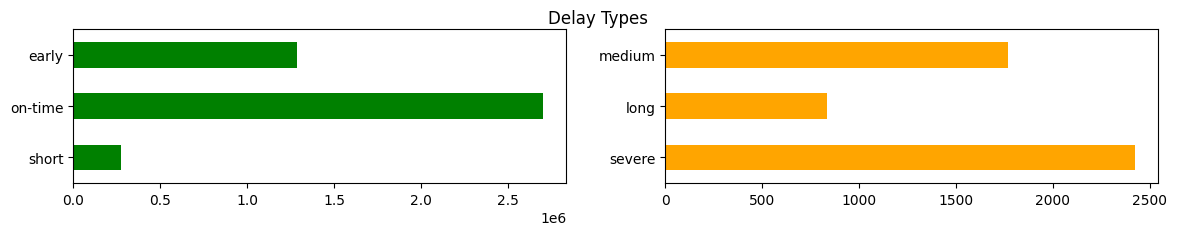

Delay Types, in %:


early      30.113106
on-time    63.329783
short       6.439212
medium      0.041527
long        0.019556
severe      0.056816
Name: Delay Type, dtype: float64

In [97]:
plt.figure(figsize=(14,2))
col = list(delay_types.keys())
plt.subplot(121)
ax4a = df['Delay Type'].value_counts().loc[col][2::-1].plot.barh(color="green")
plt.subplot(122)
ax4a = df['Delay Type'].value_counts().loc[col][:2:-1].plot.barh(color="orange")
plt.suptitle("Delay Types")
plt.show()

print("Delay Types, in %:")
df['Delay Type'].value_counts().loc[col]/len(df)*100